In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

import re

In [21]:
# Datasets for Q1
sales = pd.read_csv('sales.csv')
hierarc = pd.read_csv('product_hierarchy.csv')
store = pd.read_csv('store_cities.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [22]:
sales.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
product_id,19454838,649,P0125,140997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_id,19454838,144,S0038,356019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,19454838,1092,2019-08-10,20945,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales,1.82641e+07,NaN,NaN,NaN,0.43619,14.6636,0,0,0,0,43301
revenue,1.82641e+07,NaN,NaN,NaN,2.06417,39.8957,0,0,0,0,84198
stock,1.82641e+07,NaN,NaN,NaN,15.881,37.2801,0,4,8,17,4716
price,1.88829e+07,NaN,NaN,NaN,15.5833,32.2961,0.01,3.35,7.95,16.9,1599
promo_type_1,19454838,17,PR14,16803149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
promo_bin_1,2651689,5,verylow,1117148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
promo_type_2,19454838,4,PR03,19395757,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
hierarc.describe().T

,count,mean,std,min,25%,50%,75%,max
product_length,681.0,7.232305,8.512507,0.0,3.00,5.0,8.00,100.0
product_depth,683.0,18.460908,14.269750,0.0,10.90,17.0,23.15,165.0
product_width,683.0,13.454758,10.137132,0.0,7.45,10.8,16.00,100.0


In [24]:
store.describe().T

,count,mean,std,min,25%,50%,75%,max
store_size,144.0,23.847222,13.040185,6.0,15.0,19.5,28.25,86.0


In [25]:
# Drop promo_discount_type_2, promo_discount_2, promo_bin_2, promo_bin_1
sales.isna().sum().sort_values(ascending=False)/len(sales)

promo_discount_type_2    0.996963
promo_discount_2         0.996963
promo_bin_2              0.996963
promo_bin_1              0.863700
stock                    0.061206
revenue                  0.061206
sales                    0.061206
price                    0.029400
promo_type_2             0.000000
promo_type_1             0.000000
date                     0.000000
store_id                 0.000000
product_id               0.000000
dtype: float64

In [26]:
sales.drop(["promo_discount_type_2", "promo_discount_2", "promo_bin_2", "promo_bin_1"],axis=1, inplace=True)

In [27]:
df = pd.merge(sales, hierarc[['product_id', 'hierarchy1_id', 'hierarchy2_id', 'hierarchy3_id', 'hierarchy4_id']], left_on='product_id', right_on='product_id')

In [28]:
df.head()

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_type_2,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id
0,P0001,S0002,2017-01-02,0.0,0.00,8.0,6.25,PR14,PR03,H01,H0105,H010501,H01050100
1,P0001,S0012,2017-01-02,1.0,5.30,0.0,6.25,PR14,PR03,H01,H0105,H010501,H01050100
2,P0001,S0013,2017-01-02,2.0,10.59,0.0,6.25,PR14,PR03,H01,H0105,H010501,H01050100
3,P0001,S0023,2017-01-02,0.0,0.00,6.0,6.25,PR14,PR03,H01,H0105,H010501,H01050100
4,P0001,S0025,2017-01-02,0.0,0.00,1.0,6.25,PR14,PR03,H01,H0105,H010501,H01050100


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19454838 entries, 0 to 19454837
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   product_id     object 
 1   store_id       object 
 2   date           object 
 3   sales          float64
 4   revenue        float64
 5   stock          float64
 6   price          float64
 7   promo_type_1   object 
 8   promo_type_2   object 
 9   hierarchy1_id  object 
 10  hierarchy2_id  object 
 11  hierarchy3_id  object 
 12  hierarchy4_id  object 
dtypes: float64(4), object(9)
memory usage: 2.0+ GB


In [30]:
df.describe(include="all")

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_type_2,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id
count,19454838,19454838,19454838,1.826408e+07,1.826408e+07,1.826408e+07,1.888286e+07,19454838,19454838,19454838,19454838,19454838,19454838
unique,649,144,1092,NaN,NaN,NaN,NaN,17,4,4,18,79,167
top,P0125,S0038,2019-08-10,NaN,NaN,NaN,NaN,PR14,PR03,H00,H0003,H000312,H00031200
freq,140997,356019,20945,NaN,NaN,NaN,NaN,16803149,19395757,9275056,3425071,1472699,1155383
mean,NaN,NaN,NaN,4.361900e-01,2.064174e+00,1.588102e+01,1.558334e+01,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.466364e+01,3.989569e+01,3.728009e+01,3.229611e+01,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000e+00,0.000000e+00,4.000000e+00,3.350000e+00,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,0.000000e+00,0.000000e+00,8.000000e+00,7.950000e+00,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1.700000e+01,1.690000e+01,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.isna().sum().sort_values(ascending=False)/len(df)

stock            0.061206
revenue          0.061206
sales            0.061206
price            0.029400
hierarchy4_id    0.000000
hierarchy3_id    0.000000
hierarchy2_id    0.000000
hierarchy1_id    0.000000
promo_type_2     0.000000
promo_type_1     0.000000
date             0.000000
store_id         0.000000
product_id       0.000000
dtype: float64

In [32]:
# It will convert columns that have string dtypes to pandas category type
def train_cats(df):
    for n,c in df.items():
        if is_string_dtype(c):
            df[n] = c.astype("category").cat.as_ordered()
            
df_categorized = df.copy()
train_cats(df_categorized)

In [33]:
# Missing of the entry can also be a valuable information
# So we will create a column that is False when value is missing
# We encoded missingness in categorical columns so we will just create _na columns for numerical types
def fix_missing(df, col, name):
    if is_numeric_dtype(col):
        if pd.isnull(col).sum():
            df[name+"_na"] = pd.isnull(col)
        df[name] = col.fillna(col.median())
        
# We will have codes starting from 0 (for missing)
def numericalize(df, col, name):
    if not is_numeric_dtype(col):
        df[name] = col.cat.codes+1
        

    
def proc_df(df):
    
#     y = df[y_fld].values
#     df.drop([y_fld], axis = 1, inplace = True)
    
    for n, c in df.items():
        fix_missing(df, c, n)
        
    for n, c in df.items():
        numericalize(df, c, n)
    
#     y = df[y_fld].values
#     df.drop([y_fld], axis = 1, inplace = True)
    
#     res = [df, y]
    
    return df

In [34]:
df_categ = proc_df(df_categorized)

<AxesSubplot:>

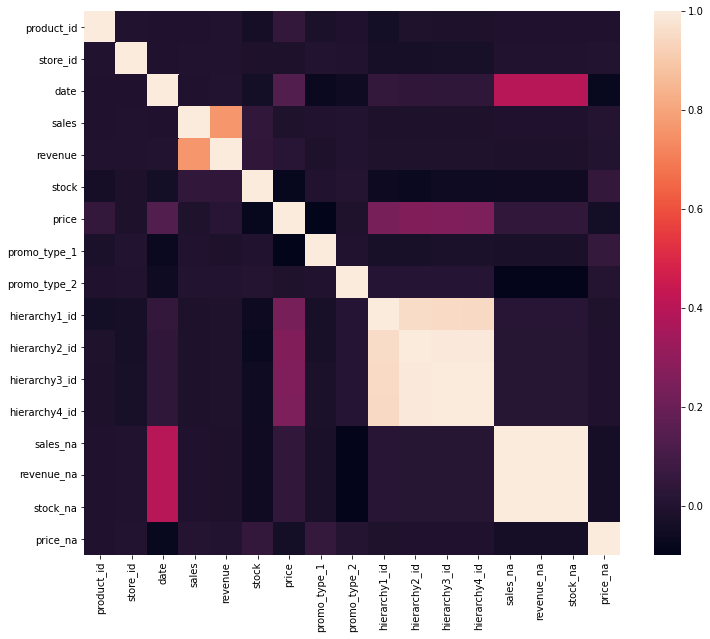

In [35]:
# En yüksek korelasyon date ve price ile arasında var
plt.figure(figsize=(12,10))
sns.heatmap(df_categorized.corr())

In [36]:
df_categ_2 = df_categ.copy()

In [37]:
df_categ_2.head()

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_type_2,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,sales_na,revenue_na,stock_na,price_na
0,1,2,1,0.0,0.00,8.0,6.25,13,3,2,6,26,53,False,False,False,False
1,1,12,1,1.0,5.30,0.0,6.25,13,3,2,6,26,53,False,False,False,False
2,1,13,1,2.0,10.59,0.0,6.25,13,3,2,6,26,53,False,False,False,False
3,1,23,1,0.0,0.00,6.0,6.25,13,3,2,6,26,53,False,False,False,False
4,1,25,1,0.0,0.00,1.0,6.25,13,3,2,6,26,53,False,False,False,False


In [38]:
#dt_name is the name of the column that is of type datepart
def add_datepart(df, dt_name, drop=True, time=False):
    "Creates new columns from our datetime column"
    
    
    dt_column = df[dt_name]
    column_dtype = dt_column.dtype
    

    targ_name = re.sub('[Dd]ate$', '', dt_name)
    
    # attributes are normally in lower case but we wrote this way because we will use it in columns' name too
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    
    if time: 
        attr = attr + ['Hour', 'Minute', 'Second']
        
    
    #Sorry curse of dimensionality, maybe another time
    for a in attr: 
        df[targ_name + a] = getattr(dt_column.dt, a.lower())
        
    # how much time passed, we will divide by 10^9 because it is in the nanosecond format
    df[targ_name + 'Elapsed'] = dt_column.astype(np.int64) // 10 ** 9
    
    if drop: 
        df.drop(dt_name, axis=1, inplace=True)

In [39]:
df_categ_2.date = pd.to_datetime(df_categ_2.date)
add_datepart(df_categ_2, 'date')

<ipython-input-38-78cc1faf6acb>:22: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df[targ_name + a] = getattr(dt_column.dt, a.lower())


In [40]:
df_sales = pd.DataFrame(df.groupby(by=["product_id","hierarchy4_id","date"],as_index=False)["sales"].sum())
df_sales.head(20)

,product_id,hierarchy4_id,date,sales
0,P0001,H01050100,2017-01-02,6.0
1,P0001,H01050100,2017-01-03,1.0
2,P0001,H01050100,2017-01-04,2.0
3,P0001,H01050100,2017-01-05,1.0
4,P0001,H01050100,2017-01-06,3.0
5,P0001,H01050100,2017-01-07,9.0
6,P0001,H01050100,2017-01-08,2.0
7,P0001,H01050100,2017-01-09,1.0
8,P0001,H01050100,2017-01-10,1.0
9,P0001,H01050100,2017-01-11,4.0


In [41]:
df_sales_2017 = df_sales[(df_sales["date"]>="2018-01-01") & (df_sales["date"]<="2018-12-31")]
df_sales_2017.head(20)

,product_id,hierarchy4_id,date,sales
364,P0001,H01050100,2018-01-01,6.0
365,P0001,H01050100,2018-01-02,5.0
366,P0001,H01050100,2018-01-03,4.0
367,P0001,H01050100,2018-01-04,5.0
368,P0001,H01050100,2018-01-05,13.0
369,P0001,H01050100,2018-01-06,3.0
370,P0001,H01050100,2018-01-07,10.0
371,P0001,H01050100,2018-01-08,2.0
372,P0001,H01050100,2018-01-09,3.0
373,P0001,H01050100,2018-01-10,6.0


In [42]:
df_sales_2017.groupby(by="hierarchy4_id").nunique().head(30)

,product_id,date,sales
hierarchy4_id,,,
H00000300,4,365,421
H00000309,1,365,85
H00000310,1,365,103
H00000400,5,365,110
H00000405,7,365,195
H00000500,2,365,149
H00000505,3,365,60
H00010000,1,365,8
H00010010,1,365,79


In [43]:
df_sales_2017[df_sales_2017["hierarchy4_id"] == "H00000405"]["product_id"].unique()

array(['P0110', 'P0249', 'P0265', 'P0427', 'P0459', 'P0520', 'P0663'],
      dtype=object)

Text(0, 0.5, 'Sales')

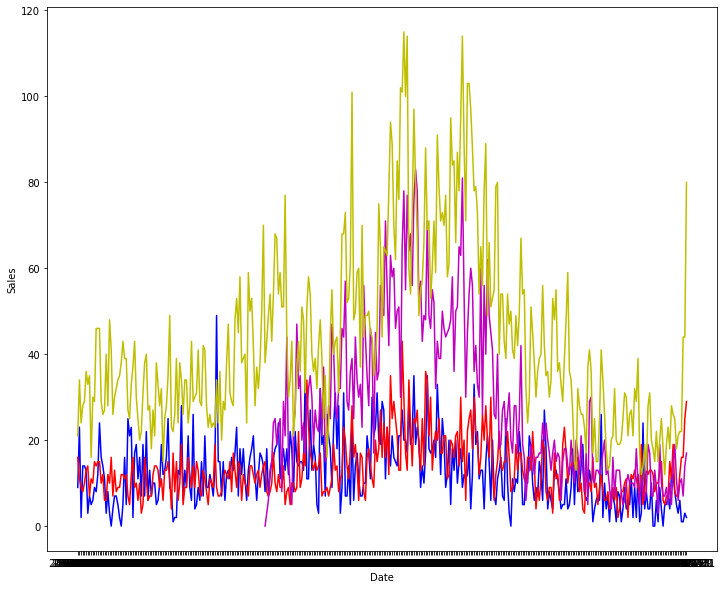

In [44]:
#2018 yılı için yıl boyunca aynı hiyerarşi 4 id'sine sahip ürünler benzer satış yükseliş ve artışı göstermiş.
# hierarchy4_id=H00000405 
plt.figure(figsize=(12,10))
plt.plot(df_sales_2017[df_sales_2017["product_id"]=='P0110']["date"], df_sales_2017[df_sales_2017["product_id"]=='P0110']["sales"], "b")
plt.plot(df_sales_2017[df_sales_2017["product_id"]=='P0249']["date"], df_sales_2017[df_sales_2017["product_id"]=='P0249']["sales"], "r")
plt.plot(df_sales_2017[df_sales_2017["product_id"]=='P0265']["date"], df_sales_2017[df_sales_2017["product_id"]=='P0265']["sales"], "m")
plt.plot(df_sales_2017[df_sales_2017["product_id"]=='P0427']["date"], df_sales_2017[df_sales_2017["product_id"]=='P0427']["sales"], "y")

plt.xlabel("Date")
plt.ylabel("Sales")

In [101]:
df_sales_2017[df_sales_2017["hierarchy4_id"] == "H00020009"]["product_id"].unique()

array(['P0116', 'P0198', 'P0590', 'P0697'], dtype=object)

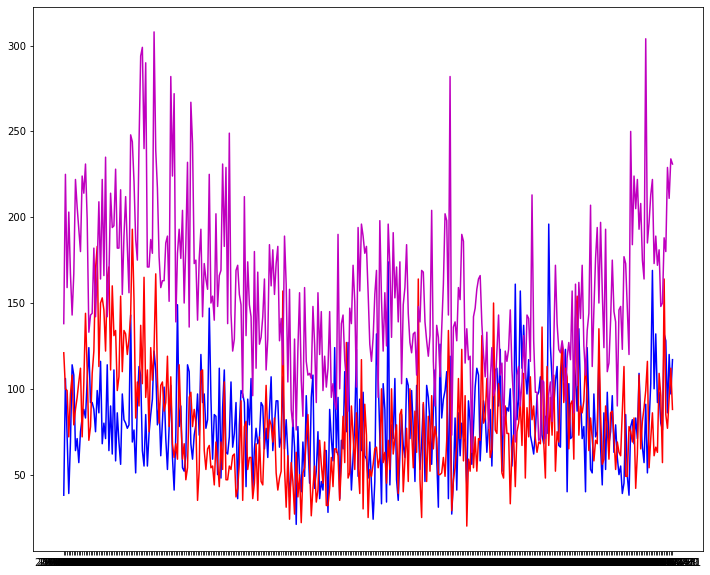

In [103]:
#2018 yılı için yıl boyunca aynı hiyerarşi 4 id'sine sahip ürünler benzer satış yükseliş ve artışı göstermiş.
# hierarchy4_id=H00000405 
plt.figure(figsize=(12,10))
plt.plot(df_sales_2017[df_sales_2017["product_id"]=='P0116']["date"], df_sales_2017[df_sales_2017["product_id"]=='P0116']["sales"], "b")
plt.plot(df_sales_2017[df_sales_2017["product_id"]=='P0198']["date"], df_sales_2017[df_sales_2017["product_id"]=='P0198']["sales"], "r")
plt.plot(df_sales_2017[df_sales_2017["product_id"]=='P0590']["date"], df_sales_2017[df_sales_2017["product_id"]=='P0590']["sales"], "m")